# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [13]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

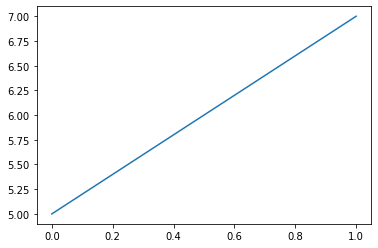

In [4]:
plt.plot(x + 2 * y + 3 * z)

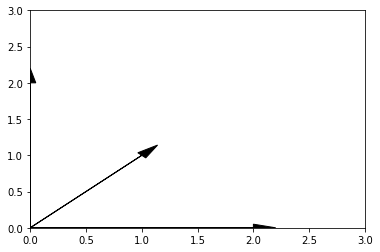

In [5]:
ax = plt.axes()

plt.xlim( [0, 3] )
plt.ylim( [0, 3] )

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )

plt.show()

[5 7]


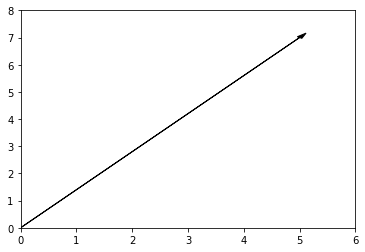

In [6]:

ax = plt.axes()

plt.xlim( [0, 6] )
plt.ylim( [0, 8] )

a = x + (2 * y) + (3 * z)
print(a)
ax.arrow( 0, 0, a[0], a[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )

plt.show()

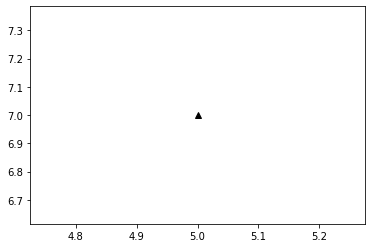

In [12]:
plt.plot(a[0], a[1], color='black', marker='^')

In [7]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [10]:
cosine( x, z )
np.arccos( cosine( x, z ) ) * 360 / 2 / np.pi

45.00000000000001

In [11]:
cosine( x, z )
np.arccos( cosine( x, z ) ) * 360 / 2 / np.pi

45.00000000000001

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [14]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

Text(0.5, 1.0, 'Модель человека')

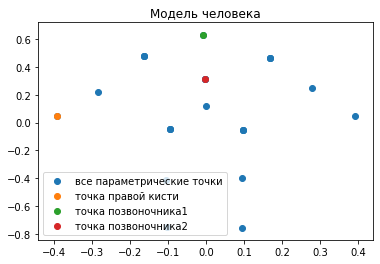

In [17]:
### модель человека
plt.scatter(df.x, df.y)
plt.scatter(df.x[21], df.y[21])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[9], df.y[9])
plt.legend(['все параметрические точки', 'точка правой кисти', 'точка позвоночника1', 'точка позвоночника2'])
plt.title('Модель человека')

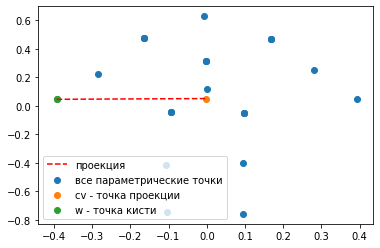

In [18]:
### вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
### вектор w - вектор кисти
w = np.array([df.x[21],df.y[21]])
### строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v
### линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', 'все параметрические точки', 'cv - точка проекции', 'w - точка правой кисти'])

In [19]:
### расстояние от правой кисти до позвоночника
linalg.norm(cv - w)

0.38940416891982127

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [21]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [22]:
np.linalg.eig(m1)

(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

In [23]:
np.linalg.eig(m2)

(array([3., 6., 3.]),
 array([[-0.81649658,  0.57735027, -0.27658128],
        [ 0.40824829,  0.57735027,  0.8035929 ],
        [-0.40824829, -0.57735027,  0.52701162]]))